In [1]:
#!/usr/bin/env python3
import os
import re
import sys
print(sys.executable)
print(sys.path)
print(sys.version)

import collections
import argparse
#import tables
import itertools
import matplotlib
import glob
import math
%matplotlib inline

import scipy.io
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import scipy.sparse as sp_sparse
import scanpy as sc 
import scanpy.external as sce

from collections import defaultdict
from scipy import sparse, io

import scanpy.external as sce
import matplotlib

from scipy.sparse import csr_matrix
from multiprocessing import Pool
#from matplotlib_venn import venn2, venn2_circles
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
print('matplotlib', matplotlib.__version__)
print('scanpy', sc.__version__)

!date +%F

/home2/s426305/.conda/envs/py36/bin/python
['', '/cm/shared/apps/cnvkit/0.9.5/lib/python3.6/site-packages', '/cm/shared/apps/python/3.6.4-anaconda/lib', '/cm/shared/apps/jupyterkernel-matlab/0.16.1/lib/python3.6/site-packages', '/home2/s426305/.conda/envs/py36/lib/python36.zip', '/home2/s426305/.conda/envs/py36/lib/python3.6', '/home2/s426305/.conda/envs/py36/lib/python3.6/lib-dynload', '/home2/s426305/.local/lib/python3.6/site-packages', '/home2/s426305/.conda/envs/py36/lib/python3.6/site-packages', '/home2/s426305/.conda/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/home2/s426305/.ipython']
3.6.7 | packaged by conda-forge | (default, Jul  2 2019, 02:18:42) 
[GCC 7.3.0]
numpy 1.16.1
pandas 0.25.1
scipy 1.1.0
matplotlib 3.3.3
scanpy 1.4
2022-01-25


## Load data
______
#### Read the clone tree text file and save as dictionary 

In [2]:
DATA_DIR = '../Data/'
Clone_dict = {}
Clone_dict_file = DATA_DIR + 'YWsg1P1-clone_tree.0.05.txt'
with open(Clone_dict_file) as f:
    first_line = f.readline()
    word = '}'
    for line in f:
        if not word in line:
            ID, clones = line.split(":")
            clone_IDs = clones.replace("'[", "").replace("]',", "").replace("'", "").strip(' \n')
            individual_clone_ID = clone_IDs.split(', ')
            Clone_dict.update({ID.strip("'") : individual_clone_ID})

## Plot the distribution of clonal size
____

In [3]:
Clone_size = []
for i in Clone_dict.keys():
    cell_num = len(Clone_dict[i])
    Clone_size.append(cell_num)

In [4]:
len(Clone_size)

9716

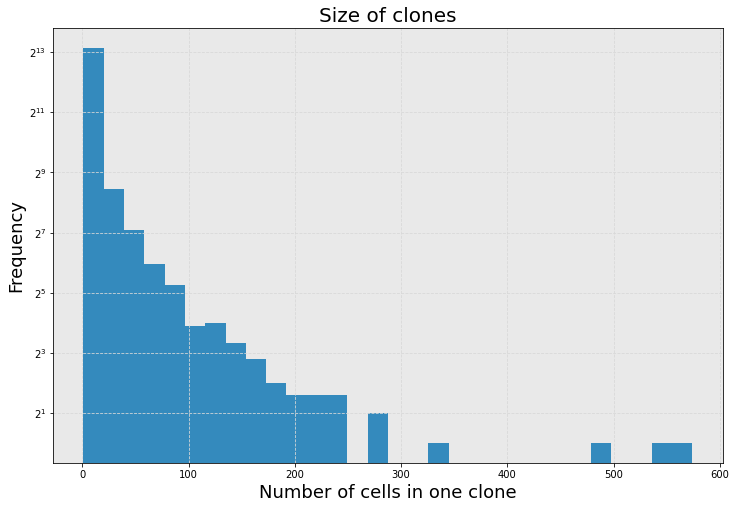

In [5]:
fig, ax = plt.subplots(figsize= (12,8))
ax.grid(ls='--', color='#D8D8D8')

ax.hist(Clone_size, 
        color='#348ABD',
        bins=30,
        density=False)

ax.set_yscale('log', base=2)
ax.set_facecolor('#E9E9E9')

ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of cells in one clone', fontsize=18)
ax.set_title("Size of clones", fontsize=20)
plt.show()